# Estudo NLTK e Gensim

Notebook baseado no estudo do Homero

In [1]:
import string
import numpy as np
import pandas as pd

# NLTK
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Gemsin
import gensim
from gensim.models import Word2Vec

# SkLearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# XBGBoost
import xgboost as xgb
import tensorflow as tf

In [2]:
print("nltk.__version__", nltk.__version__)
print("sklearn.__version__", sklearn.__version__)
print("gensim.__version__", gensim.__version__)
print("xgboost.__version__", xgb.__version__)
print("tensorflow.__version__", tf.__version__)

nltk.__version__ 3.7
sklearn.__version__ 1.0.2
gensim.__version__ 4.3.0
xgboost.__version__ 1.7.5
tensorflow.__version__ 2.12.0


In [3]:
# download das bases do NLTK que serão utilizadas
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("words")
nltk.download('movie_reviews')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [4]:
stemmer = SnowballStemmer("english")

In [5]:
# Lista para armazenar documentos e labels
documents = []

# Iterar sobre as categorias
for category in movie_reviews.categories():
  for fileid in movie_reviews.fileids(category):
    # Obter o texto bruto do arquivo e a categoria
    doc = movie_reviews.raw(fileid)
    label = category
    # Adicionar o documento e label à lista
    documents.append((doc, label))

In [6]:
def pre_processed_docs(documents, remove_stopwords=True):
    # Pré-processamento
    stop_words = set(stopwords.words('english'))

    processed_docs = []
    processed_sentences = []
  
    for doc, label in documents:
        # Tokenização e conversão para minúsculas
        text = doc.lower()
        text = doc
        tokens = word_tokenize(text)

        # Remoção de pontuação
        tokens = [token for token in tokens if token not in string.punctuation]

        # Remoção de stopwords
        if remove_stopwords:
            tokens = [token for token in tokens if token not in stop_words]

        # Lematização
        # tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Stemmização
        tokens = [stemmer.stem(token) for token in tokens]
    
        # Adicionar documento processado e rótulo à lista
        processed_docs.append((tokens, label))
        processed_sentences.append(tokens)

    return processed_docs, processed_sentences 

In [7]:
processed_docs, processed_sentences = pre_processed_docs(documents)
processed_docs_complete, processed_sentences_complete = pre_processed_docs(documents, False)


In [8]:
labels = [label for doc, label in processed_docs]
print(np.unique(labels))

['neg' 'pos']


In [9]:
print(labels.count("neg"), labels.count("pos"))

1000 1000


Total de tokens: 746107
Total de tokens únicos: 32039
Tokens mais comuns: [("'s", 18128), ('``', 17625), ('film', 11109), ('movi', 6861), ("n't", 6217), ('one', 5760), ('like', 3990), ('charact', 3857), ('get', 3192), ('make', 3155), ('time', 2900), ('scene', 2642), ('even', 2606), ('good', 2383), ('play', 2361), ('stori', 2321), ('would', 2264), ('see', 2202), ('--', 2055), ('much', 2025), ('also', 1965), ('go', 1954), ('seem', 1952), ('way', 1857), ('two', 1827), ('end', 1827), ('look', 1825), ('take', 1800), ('first', 1780), ('come', 1766), ('well', 1718), ('work', 1695), ('thing', 1657), ('could', 1610), ('year', 1562), ('realli', 1556), ('know', 1553), ('plot', 1551), ('perform', 1522), ('littl', 1494), ('life', 1483), ('peopl', 1464), ('bad', 1459), ('love', 1426), ('never', 1364), ('man', 1357), ('tri', 1339), ('show', 1339), ('best', 1304), ('new', 1279)]


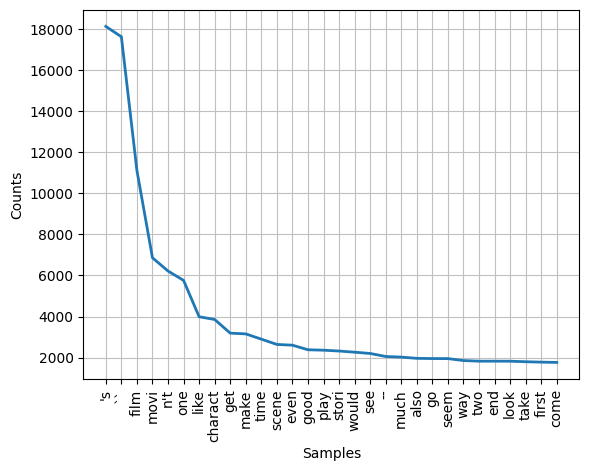

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [10]:
# Análise documentos quando stopwords são removidas
tokens = [doc for doc, label in processed_docs]
tokens = [token for token in tokens for token in token]
frequencia = nltk.FreqDist(tokens)

print("Total de tokens:", len(tokens))
print("Total de tokens únicos:", len(set(tokens)))
print("Tokens mais comuns:", frequencia.most_common(50))


frequencia.plot(30)

Total de tokens: 1341545
Total de tokens únicos: 32120
Tokens mais comuns: [('the', 76313), ('a', 37995), ('and', 35404), ('of', 33978), ('to', 31772), ('is', 26054), ('in', 21614), ('it', 18328), ("'s", 18128), ('``', 17625), ('that', 15918), ('as', 11349), ('film', 11109), ('with', 10783), ('for', 9918), ('this', 9573), ('his', 9570), ('i', 8850), ('he', 8841), ('but', 8604), ('be', 7454), ('on', 7252), ('are', 7204), ('movi', 6861), ('by', 6218), ("n't", 6217), ('one', 5760), ('an', 5743), ('not', 5689), ('who', 5680), ('have', 5594), ('you', 5290), ('was', 5225), ('from', 4987), ('at', 4972), ('they', 4815), ('has', 4811), ('her', 4525), ('all', 4260), ('like', 3990), ('charact', 3857), ('there', 3760), ('so', 3586), ('about', 3519), ('out', 3445), ('do', 3436), ('more', 3343), ('what', 3314), ('when', 3257), ('get', 3192)]


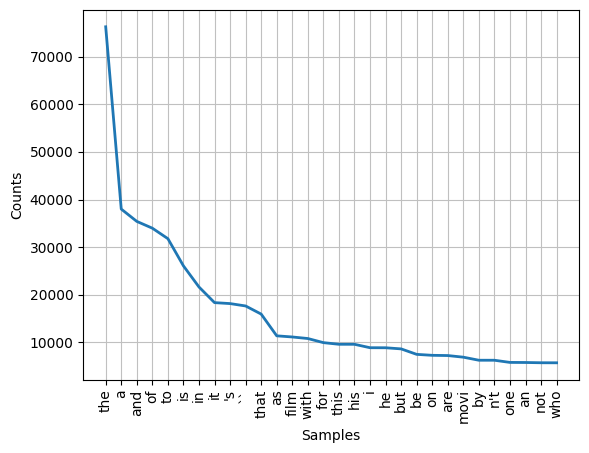

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [11]:
# Análise documentos quando stopwords não são removidas
tokens = [doc for doc, label in processed_docs_complete]
tokens = [token for token in tokens for token in token]
frequencia = nltk.FreqDist(tokens)

print("Total de tokens:", len(tokens))
print("Total de tokens únicos:", len(set(tokens)))
print("Tokens mais comuns:", frequencia.most_common(50))


frequencia.plot(30)

## Utilização do Gensim para processamento dos dados

Pelo que eu estudei, o melhor é passar para o Word2Vec as frases inteiras ao invés de palavras.

In [12]:
model = Word2Vec(processed_sentences)
model_complete = Word2Vec(processed_sentences_complete)

In [13]:
# gravando o modelo
# desta maneira, posso acelerar o processamento, se necessário
model.save("model.bin")
model_complete.save("model_complete.bin")

Eu reparei que muitas palavras terminadas na letra "e" estão sem a letra "e".
Veja movie ou storie logo na primeira linha.
Preciso entender qual transformação está retirando o "e" final

In [14]:
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

["'s", '``', 'film', 'movi', "n't", 'one', 'like', 'charact', 'get', 'make', 'time', 'scene', 'even', 'good', 'play', 'stori', 'would', 'see', '--', 'much', 'also', 'go', 'seem', 'way', 'two', 'end', 'look', 'take', 'first', 'come', 'well', 'work', 'thing', 'could', 'year', 'realli', 'know', 'plot', 'perform', 'littl', 'life', 'peopl', 'bad', 'love', 'never', 'man', 'show', 'tri', 'best', 'new', 'give', 'mani', 'star', 'want', 'say', 'actor', 'director', 'great', 'watch', 'find', 'action', 'use', 'becom', 'think', 'role', 'anoth', 'act', 'audienc', 'us', 'effect', 'back', 'someth', 'still', 'world', 'made', 'turn', 'interest', 're', 'actual', 'howev', 'feel', 'big', 'day', 'live', 'set', 'everi', 'part', 'though', 'better', 'direct', 'cast', 'enough', 'guy', 'seen', 'around', 'comedi', 'point', 'last', 'origin', 'name', 'may', 'real', 'begin', 'fact', 'right', 'run', 'script', 'funni', 'friend', 'final', 've', 'almost', 'lot', 'noth', 'john', 'although', 'place', 'long', 'moment', 'sta

In [15]:
# access vector for one word
model.wv['movi']

array([-0.78750145, -0.05274123, -0.15306832, -0.31804436, -0.3586172 ,
       -0.1028713 ,  0.49244356,  1.0723847 , -0.43669534, -1.1512457 ,
        0.58826005,  0.40164953, -0.16371122, -0.19023405,  0.9377349 ,
        0.2971343 ,  1.3404492 ,  0.44847208, -0.9052603 , -1.2982578 ,
       -0.70733327, -0.76565367,  0.50762546, -0.56388265, -0.8110017 ,
        0.32225275,  0.24680609, -0.07432269, -0.32623032,  1.1741635 ,
        0.82305   , -0.8917265 , -0.19819476,  0.36209047, -0.09951819,
        0.7047085 ,  0.3033871 , -0.8036918 , -0.7701429 ,  0.23444937,
        0.17534819, -0.2979171 , -0.16341904, -0.16500199,  1.5553857 ,
        0.13946398,  0.54767364, -0.6821397 ,  0.21466172,  0.02095423,
        0.5933782 , -0.7832528 , -0.8034098 , -1.0768431 , -1.4236722 ,
        0.03571633,  0.10998525,  0.25959125, -0.72090447,  0.10416635,
        0.40486264,  0.3893999 ,  1.4900343 , -0.35765088, -0.90897036,
        1.2688612 ,  0.25956324,  1.8150921 , -1.6587121 ,  0.19

In [16]:
# verifica a similaridade
model.wv.similarity("film" , "movi")

0.89082086

In [17]:
model.wv.most_similar(positive=["film"])

[('movi', 0.8908208608627319),
 ('pictur', 0.8832923769950867),
 ('thriller', 0.8404871821403503),
 ('credit', 0.8330211043357849),
 ('flick', 0.8013493418693542),
 ('moment', 0.7952314615249634),
 ('genr', 0.7939422726631165),
 ('entertain', 0.7779540419578552),
 ('piec', 0.7764254808425903),
 ('almost', 0.7671828866004944)]

In [18]:
# quantidade mínima de palavras
tamanho_avaliacao = []
for words, label in documents:
    words_in_model = [word for word in words if word in model.wv]
    tamanho_avaliacao.append(len(words_in_model))


In [19]:
int(np.mean(tamanho_avaliacao))

1582

In [20]:
# Convert text to feature vectors using Word2Vec embeddings
def text_to_features(documents, model, feature_size=0):

    # Preparar dados para o classificador
    X = []
    y = []
    
    label_map = {'neg': 0, 'pos': 1}

    for words, label in documents:
        word_vectors = [model.wv[word] for word in words if word in model.wv]
    
        if len(word_vectors) > 0:
            if feature_size == 0:
                document_vector = np.mean(word_vectors, axis=0)
            else:
                if len(word_vectors) > feature_size:
                    #trunca o word_vectors para o tamanho do vector_size
                    document_vector_tmp = word_vectors[:feature_size-1]
                else:
                    document_vector_tmp = word_vectors
                    #adiciona entradas 0 para completar o tamanho do vector_size
                    for i in range(len(word_vectors),feature_size):
                        document_vector_tmp.append([0]*model.wv.vector_size)

                new_shape = (document_vector_tmp[0], document_vector_tmp[1] * document_vector_tmp[2])

                # Reshape the array
                # transforma de 2D em uma lista flat
                document_vector = [item for sublist in document_vector_tmp for item in sublist]
                        
            X.append(document_vector)
            y.append(label_map[label])

    return X, y


In [21]:
def treina_avalia_modelo(document, model, feature_size=0):
    X , y = text_to_features(processed_docs, model, feature_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    xgb_classifier = xgb.XGBClassifier()
    xgb_classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = xgb_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print a classification report for more detailed evaluation
    print(classification_report(y_test, y_pred))
    
    return xgb_classifier

In [22]:
print("Avaliando modelo sem stop words e utilizando a média no Word2Vec")
treina_avalia_modelo(processed_docs, model)

Avaliando modelo sem stop words e utilizando a média no Word2Vec
Accuracy: 0.6183333333333333
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       299
           1       0.61      0.64      0.63       301

    accuracy                           0.62       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.62      0.62      0.62       600



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
print("Avaliando modelo sem stop words e utilizando as primeiras 1582 entradas do Word2Vec como features")
treina_avalia_modelo(processed_docs, model, 10)

Avaliando modelo sem stop words e utilizando as primeiras 1582 entradas do Word2Vec como features


AttributeError: 'list' object has no attribute 'reshape'

In [129]:
import numpy as np

# Example 3D array
original_array = np.array([[[1, 2],
                            [3, 4]],
                           
                           [[5, 6],
                            [7, 8]],
                           
                           [[9, 10],
                            [11, 12]]])

# Get the original shape
original_shape = original_array.shape

# Calculate the new shape by combining the second and third dimensions
new_shape = (original_shape[0], original_shape[1] * original_shape[2])

# Reshape the array
reshaped_array = original_array.reshape(new_shape)

print("Original Shape:")
print(original_shape)
print("Reshaped Array:")
print(reshaped_array)

Original Shape:
(3, 2, 2)
Reshaped Array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [130]:
new_shape

(3, 4)